# Libs

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# **Heart Disease**

1. age
1. sex
1. chest pain type (4 values)
1. resting blood pressure
1. serum cholestoral in mg/dl
1. fasting blood sugar > 120 mg/dl
1. resting electrocardiographic results (values 0,1,2)
1. maximum heart rate achieved
1. exercise induced angina
1. oldpeak = ST depression induced by exercise relative to rest
1. the slope of the peak exercise ST segment
1. number of major vessels (0-3) colored by flourosopy
1. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
1. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


Link do desafio: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# **Load data**

In [5]:
import os
os.listdir('/kaggle/input/')

['heart-disease-py']

In [6]:
df = pd.read_csv('/kaggle/input/heart-disease-py/heart.csv')

In [7]:
# verificando informações do dataset
df.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [8]:
# verificando a presença de valores nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# verificando registros duplicados

df.duplicated().sum()

723

In [10]:
# drop de registros duplicados

df_hd = df.drop_duplicates()

In [11]:
df_hd.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


<Axes: >

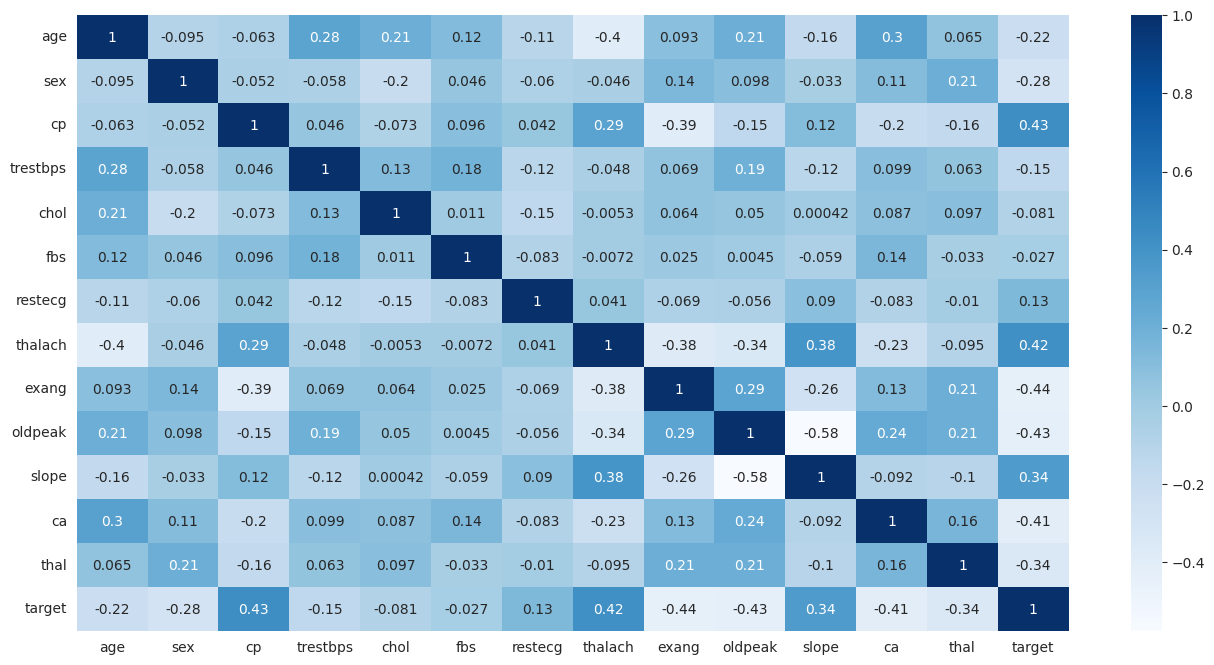

In [12]:
plt.figure(figsize = (16, 8))
sns.heatmap(df_hd.corr(), annot = True, cmap = 'Blues')

In [13]:
# separando as colunas com variáveis categóricas e numéricas

for c in df_hd.columns:
    print(f'{c}: {df_hd[c].nunique()}')

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [14]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

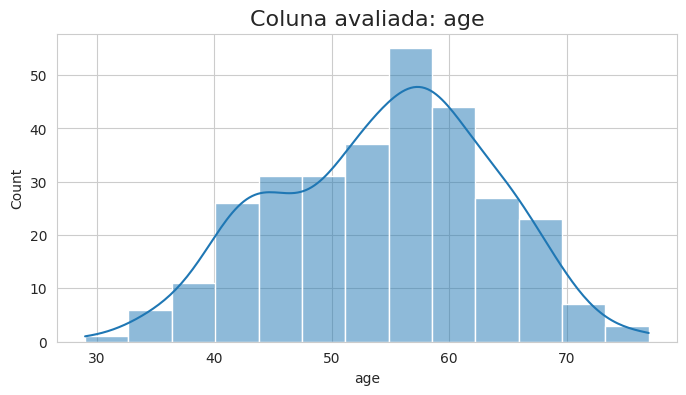

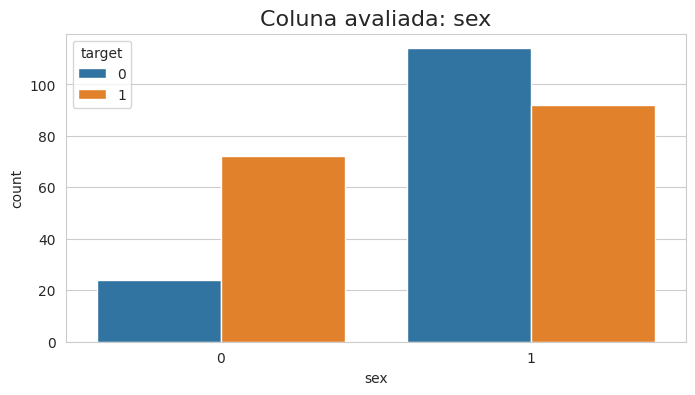

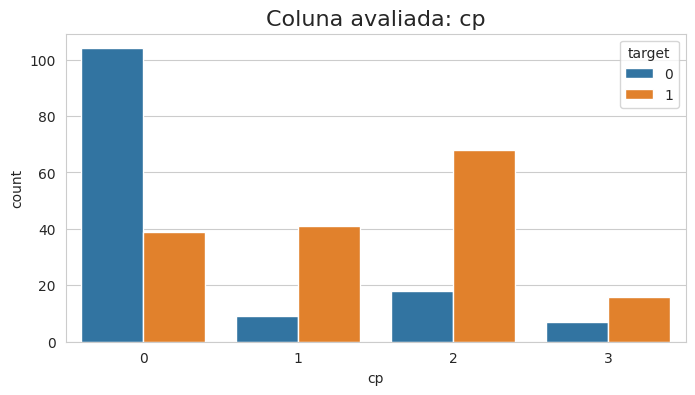

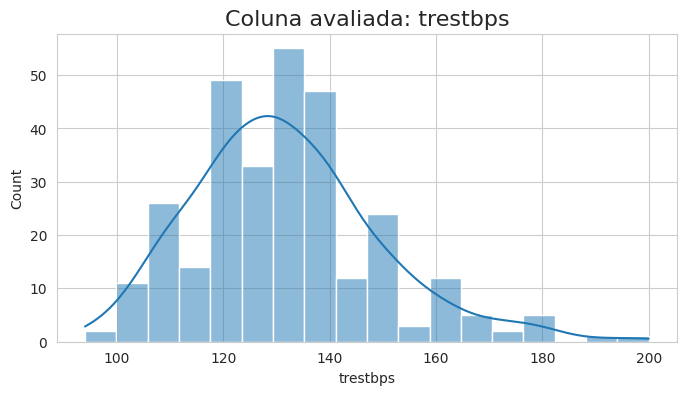

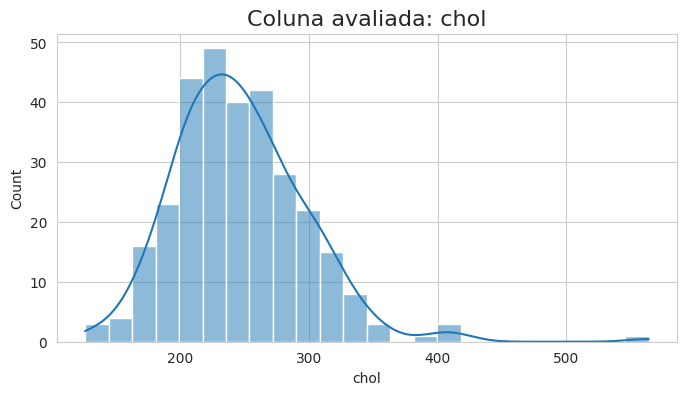

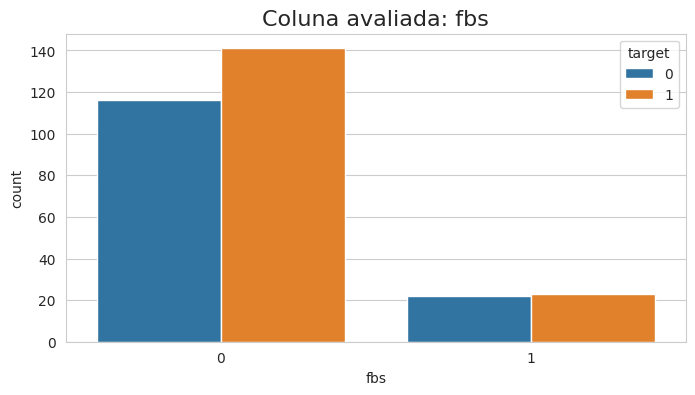

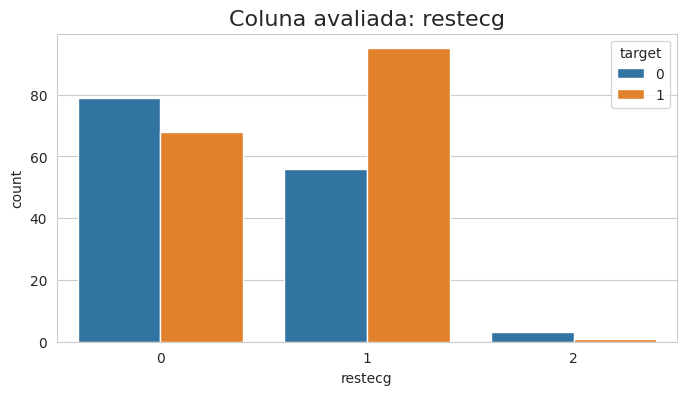

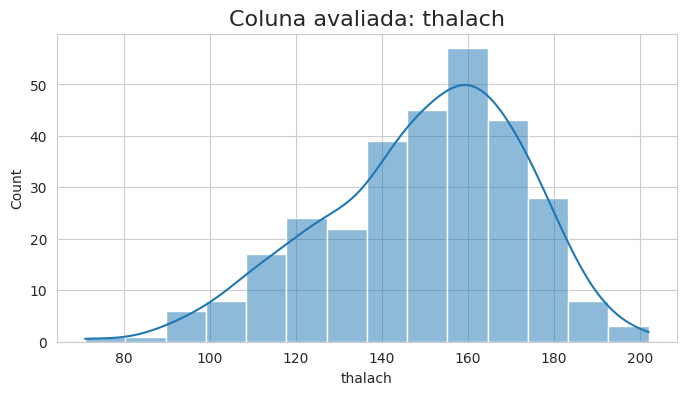

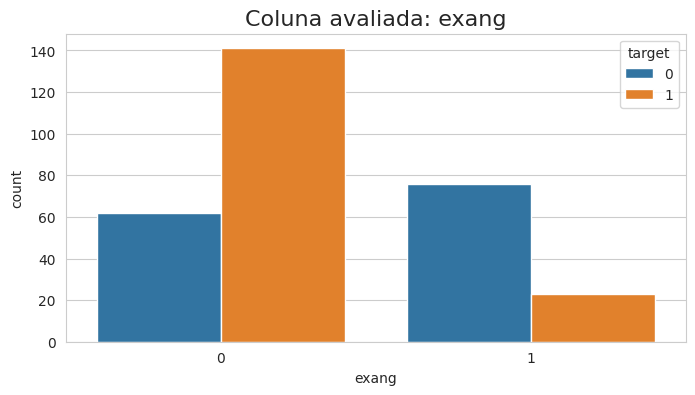

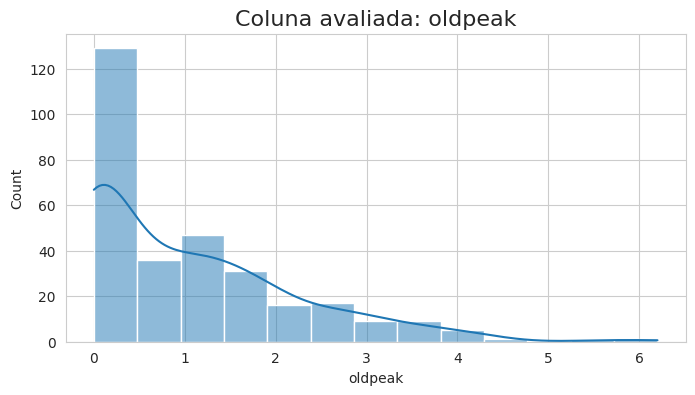

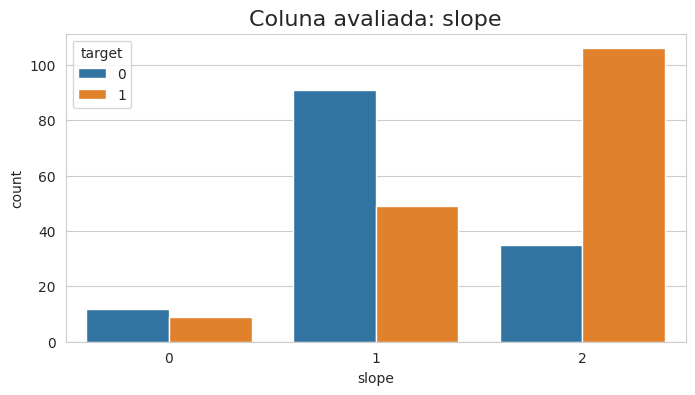

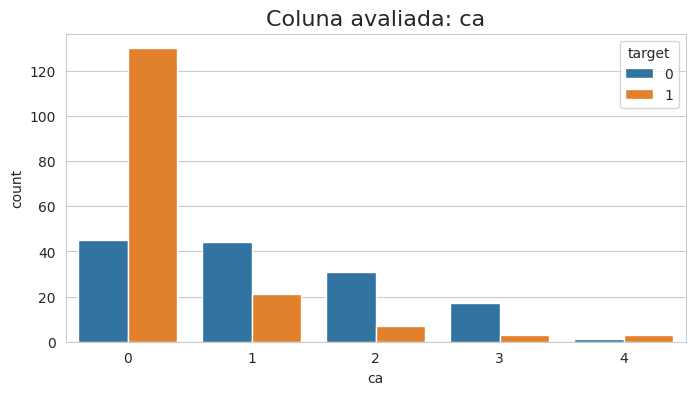

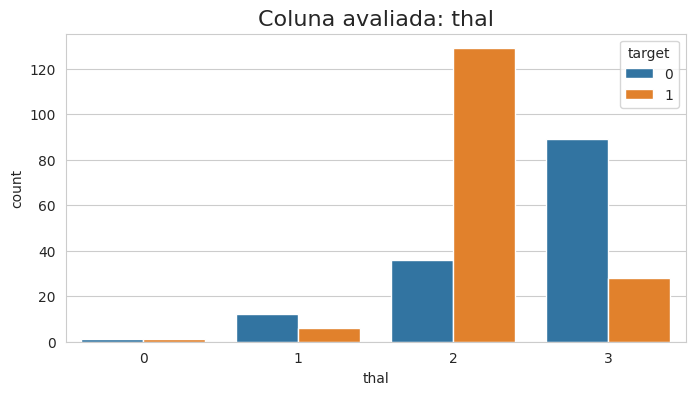

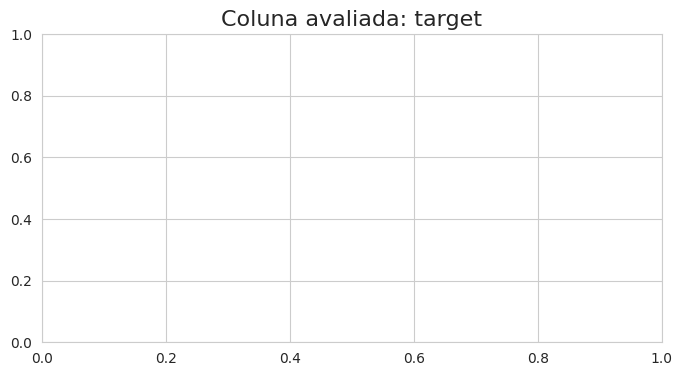

In [15]:
# criando uma função apresentar de forma visual os dados de doenças do coração para as categorias do dataset

for c in df_hd:
    plt.figure(figsize = (8,4))
    plt.title(f'Coluna avaliada: {c}', fontsize = 16)
    if c in categoricas:
        sns.countplot(x = df_hd[c], hue = df_hd['target'])
    if c in numericas:
        sns.histplot(df_hd[c], kde = True)

# **Removendo Outliers**

<Axes: >

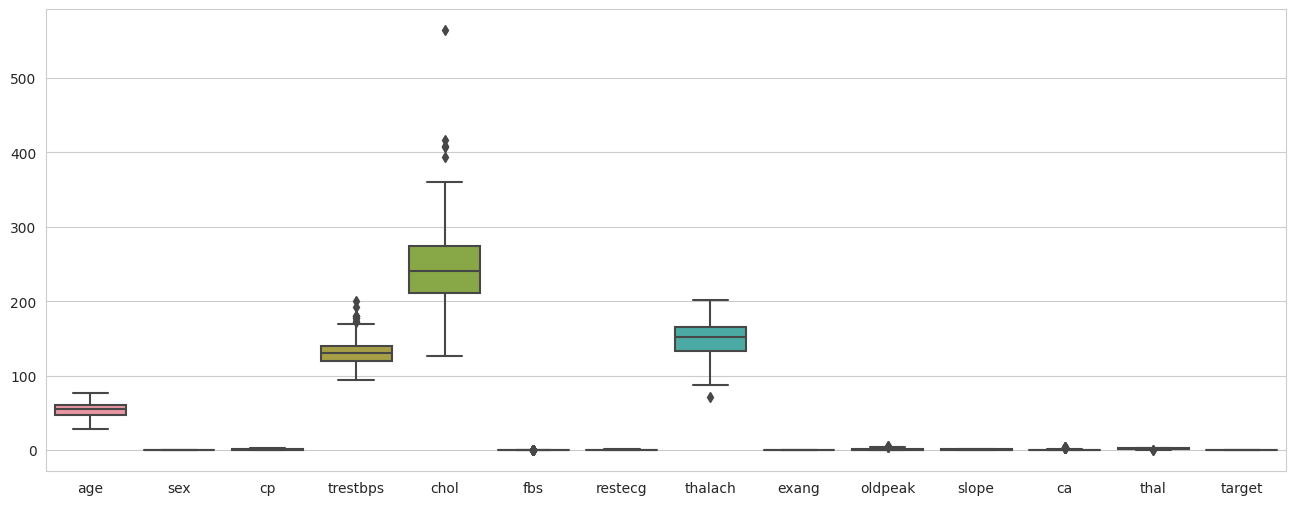

In [16]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = df_hd)

In [17]:
# definindo a remoção de 1% dos registros do último quartil com base na coluna trestbps

df_hd['trestbps'].quantile(0.99)

180.0

In [18]:
# filtrando o dataframe com base no cálculo que fizemos anteriormente

df_hd = df_hd[df_hd['trestbps'] < df_hd['trestbps'].quantile(0.99)]

In [19]:
# definindo a remoção de 2% dos registros do último quartil com base na coluna chol

df_hd['chol'].quantile(0.98)

354.4799999999999

In [20]:
# filtrando o dataframe com base no cálculo que fizemos anteriormente

df_hd = df_hd[df_hd['chol'] < df_hd['chol'].quantile(0.98)]

In [21]:
df_hd['thalach'].quantile(0.005)

88.9

In [22]:
df_hd = df_hd[df_hd['thalach'] > df_hd['thalach'].quantile(0.005)]

# **Preparando os dados para ML**

In [23]:
df_hd_ml = pd.get_dummies(df_hd, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [24]:
df_hd_ml

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
733,44,108,141,175,0.6,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
739,52,128,255,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
843,59,160,273,125,0.0,0,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


In [25]:
# separando o dataset

X = df_hd_ml.drop('target', axis = 1)
y = df_hd_ml['target']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Logistic Regression

In [27]:
# seleção do algorítimo

log = LogisticRegression(max_iter = 1000)

In [28]:
# treinando o modelo

log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
# verificando a acurácia do modelo de treino

log.score(X_train, y_train)

0.8744588744588745

In [30]:
# verificando a acurácia do modelo de teste

log.score(X_test, y_test)

0.8448275862068966

In [55]:
### Previsão ###

y_previsto = log.predict(X_test)


array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [32]:
accuracy_score(y_test, y_previsto)

0.8448275862068966

In [33]:
# classificarion report

print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [34]:
# confusion matrix

confusion_matrix(y_test, y_previsto)

array([[18,  6],
       [ 3, 31]])

------

In [35]:
# criando função para o modelo

def relatorio_ml (df, algoritmo, opt = 2):
    X = df.drop('target', axis = 1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()
        
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f'Acurácia treino: {score_train * 100:.2f}%')
    score_test = ml.score(X_test, y_test)
    print(f'Acurácia test: {score_test * 100:.2f}%')
    
    print(' ')
    print(' ')
    print(' ')
    
    y_previsto = log.predict(X_test)
    print('--- CLASSIFICATION REPORT ---')
    print(classification_report(y_test, y_previsto))
    
    print(' ')
    print(' ')
    
    print('--- CONFUSION MATRIX ---')
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Greys')
    
    return score_train, score_test
    

Acurácia treino: 87.45%
Acurácia test: 84.48%
 
 
 
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

 
 
--- CONFUSION MATRIX ---


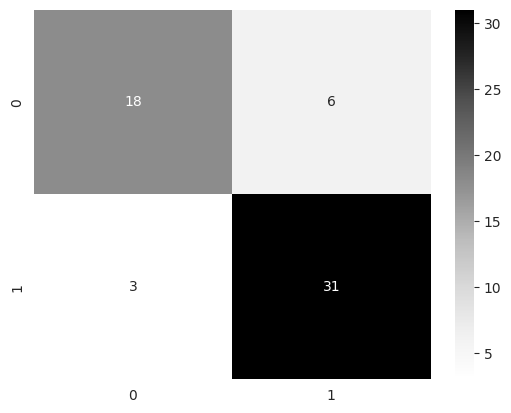

In [36]:
# aplicando o algoritmo de regressão logística através da função criada

log_train, log_test = relatorio_ml(df_hd_ml, LogisticRegression, opt = 0)

# Decision Tree

Acurácia treino: 100.00%
Acurácia test: 72.41%
 
 
 
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

 
 
--- CONFUSION MATRIX ---


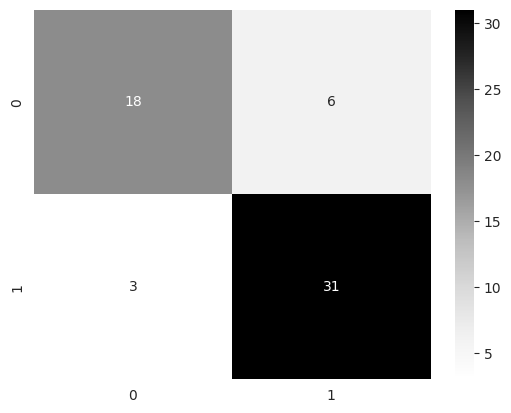

In [37]:
# aplicando o algoritmo de árvore de decisão 

tree_train, tree_test = relatorio_ml(df_hd_ml, DecisionTreeClassifier)

# AdaBoost

Acurácia treino: 93.51%
Acurácia test: 82.76%
 
 
 
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

 
 
--- CONFUSION MATRIX ---


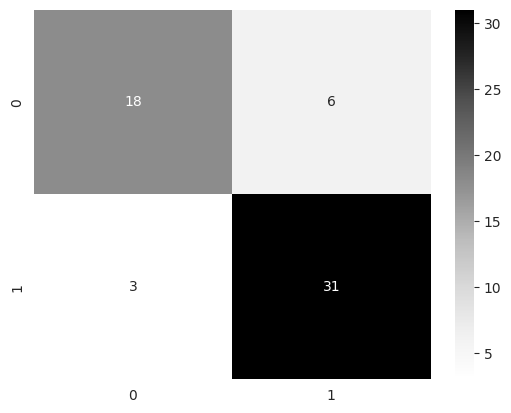

In [38]:
# aplicando o algoritmo AdaBoost

ada_train, ada_test = relatorio_ml(df_hd_ml, AdaBoostClassifier)

# KNeighbors

Acurácia treino: 77.06%
Acurácia test: 60.34%
 
 
 
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

 
 
--- CONFUSION MATRIX ---


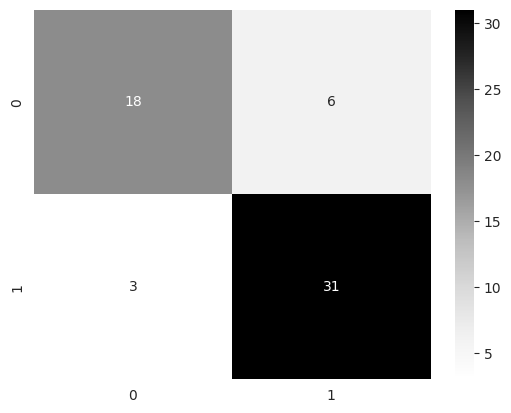

In [39]:
kn_train, kn_test = relatorio_ml(df_hd_ml, KNeighborsClassifier)

# Random Forest

Acurácia treino: 100.00%
Acurácia test: 77.59%
 
 
 
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

 
 
--- CONFUSION MATRIX ---


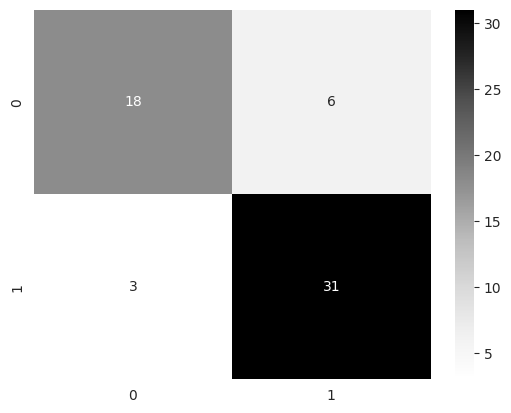

In [40]:
rand_train, rand_test = relatorio_ml(df_hd_ml, RandomForestClassifier)

# Gerando o comparativo entre os algoritmos

In [41]:
data = { 'Models' : ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Randon Forest Classifier', 'AdaBoost'],
        'Acurácia Treino': [round(log_train * 100, 2), round(tree_train * 100, 2), round(kn_train * 100, 2), 
                            round(rand_train * 100, 2), round(ada_train * 100, 2)],
        'Acurácia Teste': [round(log_test * 100, 2), round(tree_test * 100, 2), round(kn_test * 100, 2),
                          round(rand_test * 100, 2), round(ada_test * 100, 2)],
       }

df = pd.DataFrame(data)
df.sort_values(by = 'Acurácia Teste', ascending = False, inplace = True)
df

,Models,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
4,AdaBoost,93.51,82.76
3,Randon Forest Classifier,100.00,77.59
1,Decision Tree,100.00,72.41
2,KNeighbors,77.06,60.34


# Standard Scaler

In [42]:
# criando a mesma função anterior, mas aplicando o standard scaler

def relatorio_ml_scaler (df, algoritmo, opt = 2):
    X = df.drop('target', axis = 1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    #############
    scaler = StandardScaler()
    cols_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
    X_test[cols_scaler] = scaler.fit_transform(X_test[cols_scaler])
    ############
    
    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()
        
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f'Acurácia treino: {score_train * 100:.2f}%')
    score_test = ml.score(X_test, y_test)
    print(f'Acurácia test: {score_test * 100:.2f}%')
    
    print(' ')
    print(' ')
    print(' ')
    
    y_previsto = log.predict(X_test)
    print('--- CLASSIFICATION REPORT ---')
    print(classification_report(y_test, y_previsto))
    
    print(' ')
    print(' ')
    
    print('--- CONFUSION MATRIX ---')
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Greys')
    
    return score_train, score_test
    

Acurácia treino: 87.45%
Acurácia test: 84.48%
 
 
 
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.79      0.97      0.87        34

    accuracy                           0.83        58
   macro avg       0.86      0.80      0.81        58
weighted avg       0.85      0.83      0.82        58

 
 
--- CONFUSION MATRIX ---


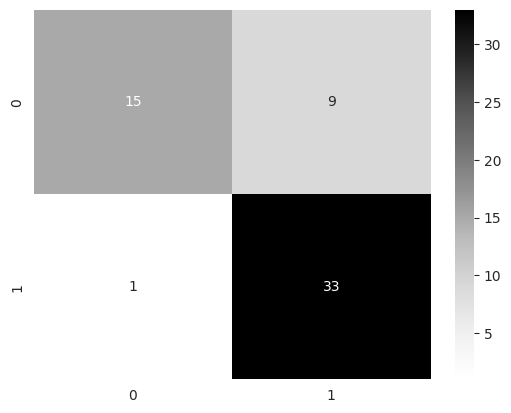

In [43]:
log_train_scaler, log_test_scaler = relatorio_ml_scaler(df_hd_ml, LogisticRegression, opt = 0)

Acurácia treino: 100.00%
Acurácia test: 67.24%
 
 
 
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.79      0.97      0.87        34

    accuracy                           0.83        58
   macro avg       0.86      0.80      0.81        58
weighted avg       0.85      0.83      0.82        58

 
 
--- CONFUSION MATRIX ---


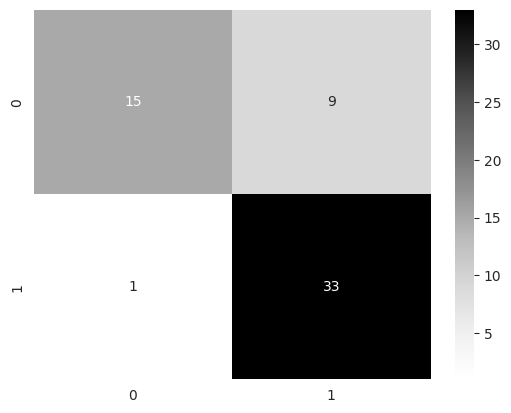

In [44]:
tree_train_scaler, tree_test_scaler = relatorio_ml_scaler(df_hd_ml, DecisionTreeClassifier)

Acurácia treino: 93.51%
Acurácia test: 82.76%
 
 
 
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.79      0.97      0.87        34

    accuracy                           0.83        58
   macro avg       0.86      0.80      0.81        58
weighted avg       0.85      0.83      0.82        58

 
 
--- CONFUSION MATRIX ---


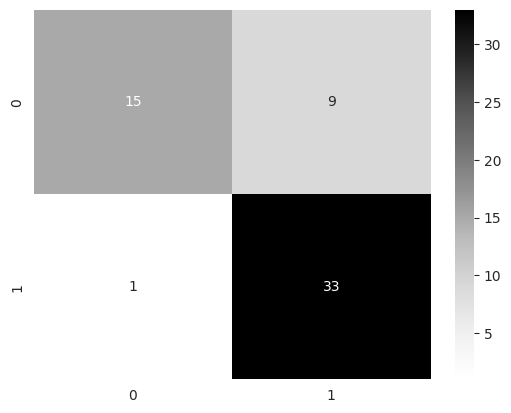

In [45]:
ada_train_scaler, ada_test_scaler = relatorio_ml_scaler(df_hd_ml, AdaBoostClassifier)

Acurácia treino: 87.45%
Acurácia test: 81.03%
 
 
 
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.79      0.97      0.87        34

    accuracy                           0.83        58
   macro avg       0.86      0.80      0.81        58
weighted avg       0.85      0.83      0.82        58

 
 
--- CONFUSION MATRIX ---


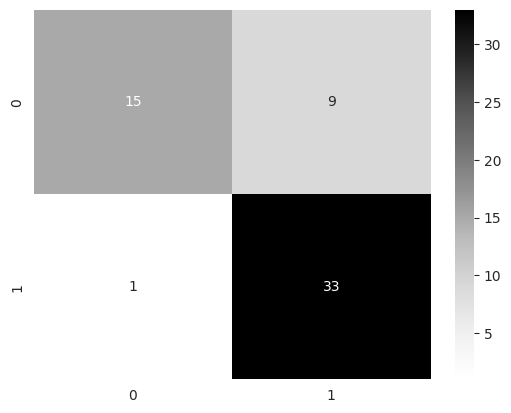

In [46]:
kn_train_scaler, kn_test_scaler = relatorio_ml_scaler(df_hd_ml, KNeighborsClassifier)

Acurácia treino: 100.00%
Acurácia test: 82.76%
 
 
 
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.79      0.97      0.87        34

    accuracy                           0.83        58
   macro avg       0.86      0.80      0.81        58
weighted avg       0.85      0.83      0.82        58

 
 
--- CONFUSION MATRIX ---


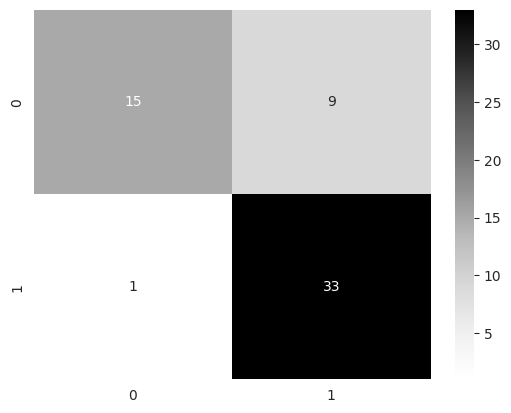

In [47]:
rand_train_scaler, rand_test_scaler = relatorio_ml_scaler(df_hd_ml, RandomForestClassifier)

In [48]:
data_scaler = { 'Models' : ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Randon Forest Classifier', 'AdaBoost'],
        'Acurácia Treino': [round(log_train_scaler * 100, 2), round(tree_train_scaler * 100, 2), round(kn_train_scaler * 100, 2), 
                            round(rand_train_scaler * 100, 2), round(ada_train_scaler * 100, 2)],
        'Acurácia Teste': [round(log_test_scaler * 100, 2), round(tree_test_scaler * 100, 2), round(kn_test_scaler * 100, 2),
                          round(rand_test_scaler * 100, 2), round(ada_test_scaler * 100, 2)],
       }

df_scaler = pd.DataFrame(data_scaler)
df_scaler.sort_values(by = 'Acurácia Teste', ascending = False, inplace = True)
df_scaler

,Models,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
3,Randon Forest Classifier,100.00,82.76
4,AdaBoost,93.51,82.76
2,KNeighbors,87.45,81.03
1,Decision Tree,100.00,67.24


# Comparando o desempenho dos algoritmos com e sem o Scaler

Text(0.5, 1.0, 'Acurácia de Teste dos algoritmos de ML')

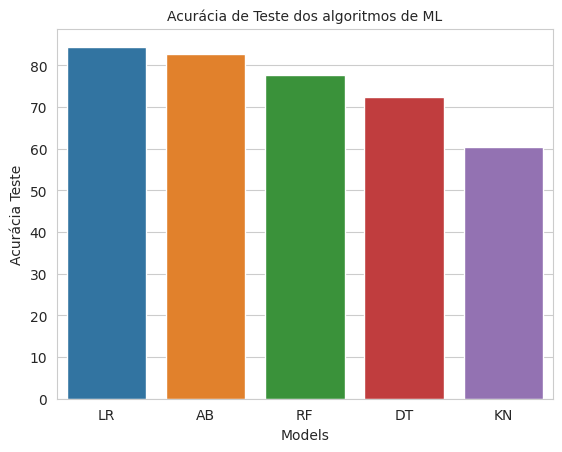

In [53]:
# dicionário de alias

aliases = {
    'Logistic Regression' : 'LR',
    'Decision Tree' : 'DT',
    'KNeighbors' : 'KN',
    'Randon Forest Classifier' : 'RF',
    'AdaBoost' : 'AB'
}

# substituir os nomes pelos aliases
df['Models'] = df['Models'].replace(aliases)

ax = sns.barplot(x = df['Models'], y = df['Acurácia Teste'])
ax.set_title('Acurácia de Teste dos algoritmos de ML', fontsize = 10)

Text(0.5, 1.0, 'Acurácia de Teste dos algoritmos de ML com Scaler')

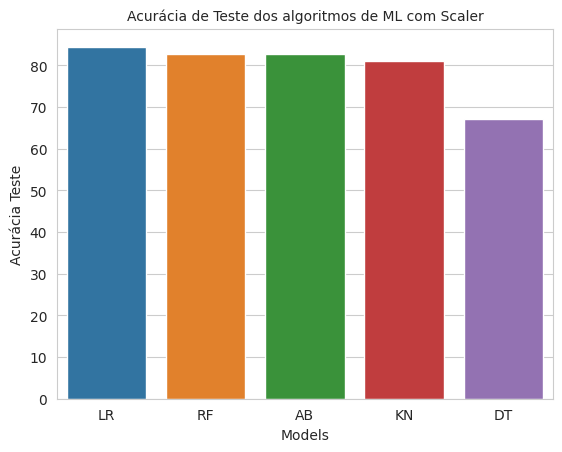

In [54]:
# dicionário de alias

aliases = {
    'Logistic Regression' : 'LR',
    'Decision Tree' : 'DT',
    'KNeighbors' : 'KN',
    'Randon Forest Classifier' : 'RF',
    'AdaBoost' : 'AB'
}

# substituir os nomes pelos aliases
df_scaler['Models'] = df_scaler['Models'].replace(aliases)

ax = sns.barplot(x = df_scaler['Models'], y = df_scaler['Acurácia Teste'])
ax.set_title('Acurácia de Teste dos algoritmos de ML com Scaler', fontsize = 10)